
CO2 Training Data and Predictions:
      Year  Actual  Predicted
0   1940.0    4.86   3.305608
1   1941.0    4.97   3.619321
2   1942.0    4.96   3.932920
3   1943.0    5.04   4.246566
4   1944.0    5.12   4.559893
..     ...     ...        ...
75  2015.0   35.46  35.110976
76  2016.0   35.46  35.654219
77  2017.0   36.03  36.201271
78  2018.0   36.77  36.747808
79  2019.0   37.04  37.301267

[80 rows x 3 columns]


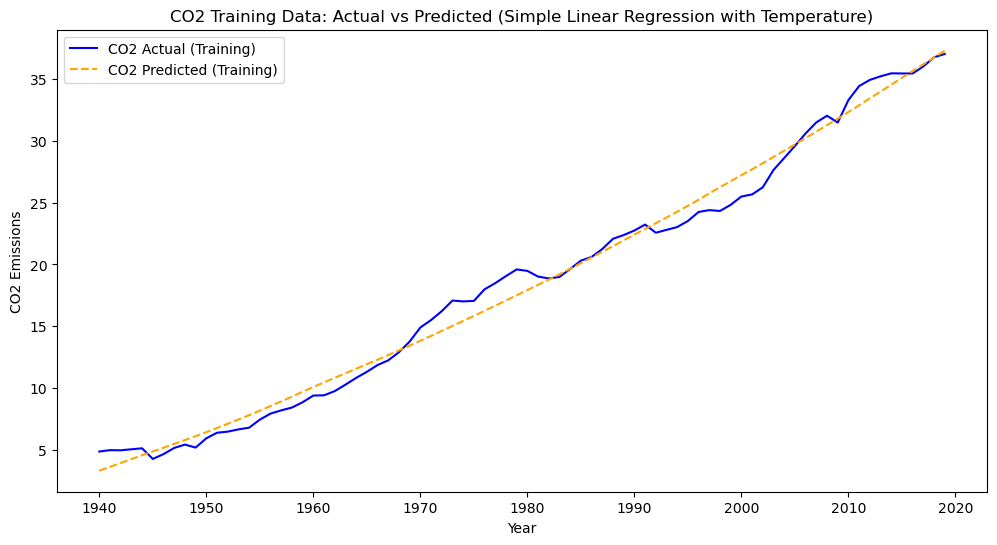

Mean Squared Error: 1.090661563124345

CH4 Training Data and Predictions:
      Year   Actual    Predicted
0   1970.0  6654.05  6708.551425
1   1971.0  6738.49  6774.462749
2   1972.0  6829.57  6843.728453
3   1973.0  7002.62  6922.070813
4   1974.0  7030.66  6991.837655
5   1975.0  7092.68  7046.174951
6   1976.0  7174.23  7100.084058
7   1977.0  7236.20  7154.171279
8   1978.0  7265.33  7217.217277
9   1979.0  7375.35  7280.972252
10  1980.0  7325.26  7326.470811
11  1981.0  7180.58  7357.541906
12  1982.0  7199.76  7387.418550
13  1983.0  7212.58  7409.415667
14  1984.0  7313.87  7436.790819
15  1985.0  7365.31  7462.454174
16  1986.0  7462.61  7488.157379
17  1987.0  7502.06  7526.143716
18  1988.0  7647.06  7574.646125
19  1989.0  7804.70  7609.219199
20  1990.0  7799.51  7628.222600
21  1991.0  7713.14  7640.623446
22  1992.0  7718.06  7655.613559
23  1993.0  7676.81  7668.981311
24  1994.0  7738.12  7690.098440
25  1995.0  7821.33  7725.406905
26  1996.0  7912.96  7768.197667
27

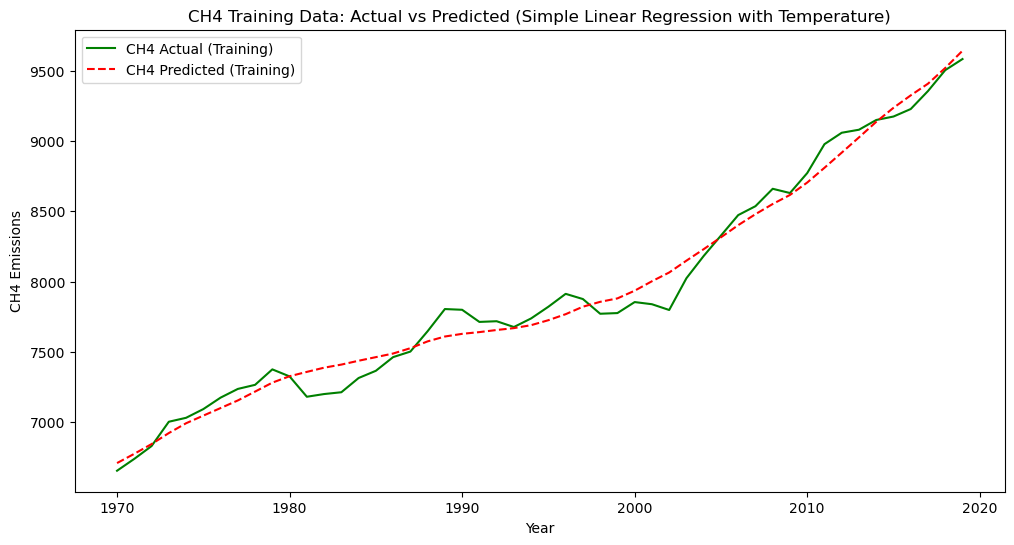

Mean Squared Error: 10467.446093088418


In [40]:
from IPython import get_ipython
from IPython.display import display
# %%
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
#datasets for CO2 and CH4 emissions
co2_data = pd.read_csv('/Users/varun/Downloads/Cleaned_CO2_Data.csv')
ch4_data = pd.read_csv('/Users/varun/Downloads/Cleaned_CH4_Data.csv')
#temp data co2 ch4
ch4_temp_data = pd.read_csv('/Users/varun/Downloads/TempChange-CH4.csv')
co2_temp_data = pd.read_csv('/Users/varun/Downloads/TempChange-CO2.csv')
# Strip column names of any extra spaces
co2_temp_data = co2_temp_data.dropna()
ch4_temp_data = ch4_temp_data.dropna()
co2_data = co2_data.dropna()
ch4_data = ch4_data.dropna()
# Merge the temperature data with the emissions data for CO2 and CH4
co2_data_merged = pd.merge(co2_data, co2_temp_data, on='Year', how='inner')
ch4_data_merged = pd.merge(ch4_data, ch4_temp_data, on='Year', how='inner')
def simple_linear_regression_training(train_data, gas_name):
    # Now we include 'Year' and 'Temperature' as features
    if gas_name == 'CO2':
        feature1 = 'CO2_FOSSIL_FUEL'
        feature2 = 'CO2_AGRI'
    if gas_name == 'CH4':
        feature1 = 'CH4_FOSSIL_FUEL'
        feature2 = 'CH4_AGRI'
    X_train = train_data[['Year',feature1,feature2]]  # Adding Temperature as a feature
    y_train = train_data[gas_name]  # The target variable remains the same (CO2 or CH4)
    # Initialize the Linear Regression model
    model = LinearRegression()
    # Train the model using the data
    model.fit(X_train, y_train)
    # Use the trained model to predict emissions values for the given 'Year' and 'Temperature' data
    y_train_pred = model.predict(X_train)
    # Create a DataFrame to store both the actual and predicted values for comparison
    training_results_df = pd.DataFrame({
        'Year': X_train['Year'],  # 'Year' as the x-axis
        'Actual': y_train,        # Actual emissions values
        'Predicted': y_train_pred # Predicted emissions values from the linear model
    })
    return training_results_df
# Train for CO2 emissions data (including Temperature feature)
co2_training_results_df = simple_linear_regression_training(co2_data_merged, 'CO2')
print("\nCO2 Training Data and Predictions:")
print(co2_training_results_df)  # Print out the actual and predicted results for CO2
# Plot the CO2 data (Actual vs Predicted)
plt.figure(figsize=(12, 6))
plt.plot(co2_training_results_df['Year'], co2_training_results_df['Actual'], label='CO2 Actual (Training)', color='blue')
plt.plot(co2_training_results_df['Year'], co2_training_results_df['Predicted'], label='CO2 Predicted (Training)', linestyle='--', color='orange')
plt.xlabel("Year")
plt.ylabel("CO2 Emissions")
plt.title("CO2 Training Data: Actual vs Predicted (Simple Linear Regression with Temperature)")
plt.legend()
plt.show()


mse = mean_squared_error(co2_training_results_df['Actual'],co2_training_results_df['Predicted'])
print(f'Mean Squared Error: {mse}')



# Train and evaluate the model for CH4 emissions data (including Temperature feature)
ch4_training_results_df = simple_linear_regression_training(ch4_data_merged, 'CH4')
print("\nCH4 Training Data and Predictions:")
print(ch4_training_results_df)  # Print out the actual and predicted results for CH4
# Plot the CH4 data (Actual vs Predicted)
plt.figure(figsize=(12, 6))
plt.plot(ch4_training_results_df['Year'], ch4_training_results_df['Actual'], label='CH4 Actual (Training)', color='green')
plt.plot(ch4_training_results_df['Year'], ch4_training_results_df['Predicted'], label='CH4 Predicted (Training)', linestyle='--', color='red')
plt.xlabel("Year")
plt.ylabel("CH4 Emissions")
plt.title("CH4 Training Data: Actual vs Predicted (Simple Linear Regression with Temperature)")
plt.legend()
plt.show()

mse = mean_squared_error(ch4_training_results_df['Actual'],ch4_training_results_df['Predicted'])
print(f'Mean Squared Error: {mse}')